### 1 - Greg was 14, Marcia was 12, Peter was 11, Jan was 10, Bobby was 8, and Cindy was 6 when they started playing the Brady kids on The Brady Bunch. Cousin Oliver was 8 years old when he joined the show. What are the mean, median, and mode of the kids' ages when they first appeared on the show? What are the variance, standard deviation, and standard error?

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
df = pd.DataFrame()
df['Name'] = ['Greg', 'Marcia', 'Peter', 'Jan', 'Bobby', 'Cindy', 'Oliver']
df['Age'] = [14, 12, 11, 10, 8, 6, 8]

In [3]:
df

,Name,Age
0,Greg,14
1,Marcia,12
2,Peter,11
3,Jan,10
4,Bobby,8
5,Cindy,6
6,Oliver,8


In [4]:
df.describe()

,Age
count,7.000000
mean,9.857143
std,2.734262
min,6.000000
25%,8.000000
50%,10.000000
75%,11.500000
max,14.000000


In [5]:
df['Age'].mean()

9.857142857142858

In [6]:
np.median(df['Age'])

10.0

In [7]:
stats.mode(df['Age'], axis = 0)[0][0]

8

In [8]:
print('The mean, median, and mode are:\nmean: {}\nmedian: {}\nmode: {}'.format(df['Age'].mean(), np.median(df['Age']),stats.mode(df['Age'], axis = 0)[0][0]))

The mean, median, and mode are:
mean: 9.857142857142858
median: 10.0
mode: 8


In [9]:
vari = df['Age'].var(ddof=0)

In [10]:
std_dev = np.std(df['Age'], ddof=0) 

In [11]:
std_err = std_dev / np.sqrt(len(df['Age']))

In [12]:
print('The variance, standard deviation, and standard error are:\nvariance: {}\nstandard deviation: {}\nstandard error: {}'.format(vari, std_dev, std_err))

The variance, standard deviation, and standard error are:
variance: 6.408163265306122
standard deviation: 2.531435020952764
standard error: 0.9567925036515135


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 2 - Using these estimates, if you had to choose only one estimate of central tendency and one estimate of variance to describe the data, which would you pick and why?

C:\Users\Crystal\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


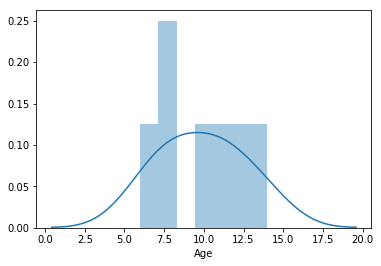

In [14]:
sns.distplot(df['Age'], bins = 7)

For central tendency, I'd pick the median because with such a small dataset, any large outliers would influence the mean too much.  But for now, the mean and median are similar.  For variance, I'd choose standard deviation since we don't need the uncertainty of the central tendency.  

###  3 - Next, Cindy has a birthday. Update your estimates- what changed, and what didn't?

In [15]:
df.loc[5, 'Age'] = 7

In [16]:
df

,Name,Age
0,Greg,14
1,Marcia,12
2,Peter,11
3,Jan,10
4,Bobby,8
5,Cindy,7
6,Oliver,8


In [17]:
print('The mean, median, and mode are:\nmean: {}\nmedian: {}\nmode: {}'.format(df['Age'].mean(), np.median(df['Age']),stats.mode(df['Age'], axis = 0)[0][0]))

The mean, median, and mode are:
mean: 10.0
median: 10.0
mode: 8


Mean increased from 9.85 to 10

In [18]:
vari = df['Age'].var(ddof=0)
std_dev = np.std(df['Age'], ddof=0) 
std_err = std_dev / np.sqrt(len(df['Age']))

print('The variance, standard deviation, and standard error are:\nvariance: {}\nstandard deviation: {}\nstandard error: {}'.format(vari, std_dev, std_err))

The variance, standard deviation, and standard error are:
variance: 5.428571428571429
standard deviation: 2.32992949004287
standard error: 0.8806305718527109


The variance, standard deviation and standard error all decreased

### 4 - Nobody likes Cousin Oliver. Maybe the network should have used an even younger actor. Replace Cousin Oliver with 1-year-old Jessica, then recalculate again. Does this change your choice of central tendency or variance estimation methods?

In [19]:
df.drop(df[df['Name']=='Oliver'].index[0], inplace = True)

In [20]:
df = df.append([{'Name': 'Jessica', 'Age': 1}])

In [21]:
df

,Name,Age
0,Greg,14
1,Marcia,12
2,Peter,11
3,Jan,10
4,Bobby,8
5,Cindy,7
0,Jessica,1


In [22]:
print('The mean, median, and mode are:\nmean: {}\nmedian: {}\nmode: {}'.format(df['Age'].mean(), np.median(df['Age']),stats.mode(df['Age'], axis = 0)[0][0]))

The mean, median, and mode are:
mean: 9.0
median: 10.0
mode: 1


In [23]:
vari = df['Age'].var(ddof = 0)
std_dev = np.std(df['Age'], ddof=0) 
std_err = std_dev / np.sqrt(len(df['Age']))

print('The variance, standard deviation, and standard error are:\nvariance: {}\nstandard deviation: {}\nstandard error: {}'.format(vari, std_dev, std_err))

The variance, standard deviation, and standard error are:
variance: 15.428571428571429
standard deviation: 3.927922024247863
standard error: 1.4846149779161806


As suspected, an outlier affected the mean but not the median.  I would still choose to use the median. Variance, std dev and std error all increased, but none as drastically as variance.  I will also still continue to use std dev.

### 5 - On the 50th anniversary of The Brady Bunch, four different magazines asked their readers whether they were fans of the show. The answers were: TV Guide 20% fans Entertainment Weekly 23% fans Pop Culture Today 17% fans SciPhi Phanatic 5% fans
Based on these numbers, what percentage of adult Americans would you estimate were Brady Bunch fans on the 50th anniversary of the show?

In [24]:
df_fans = pd.DataFrame()
df_fans['Magazine']= ['TV Guide', 'Entertainment Weekly', 'Pop Culture Today', 'SciPhi Phanatic']
df_fans['Percent'] = [20, 23, 17, 5]

In [28]:
df_fans.head()

,Magazine,Percent
0,TV Guide,20
1,Entertainment Weekly,23
2,Pop Culture Today,17
3,SciPhi Phanatic,5


Based on the information given from all the magazines, it is tempting to take the mean of all the percents.  This would give an estimate of 16.5%.  However, the magazine SciPhi Phanatic is a very different type of magazine, with a readership geared towards STEM minded people instead of entertainment/pop culture.  It would be appropriate to remove the data from SciPhi Phanatic.  Thus, the percent of fans would rise to 20%.  

In [32]:
df_fans['Percent'].mean()

16.25

In [30]:
df_fans[df_fans['Magazine'] != 'SciPhi Phanatic']['Percent'].mean()

20.0